C:\Users\movis\AppData\Local\Temp\ipykernel_16244\3579884317.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['Nombre'] = df_sp['Nombre'].astype('category').cat.codes


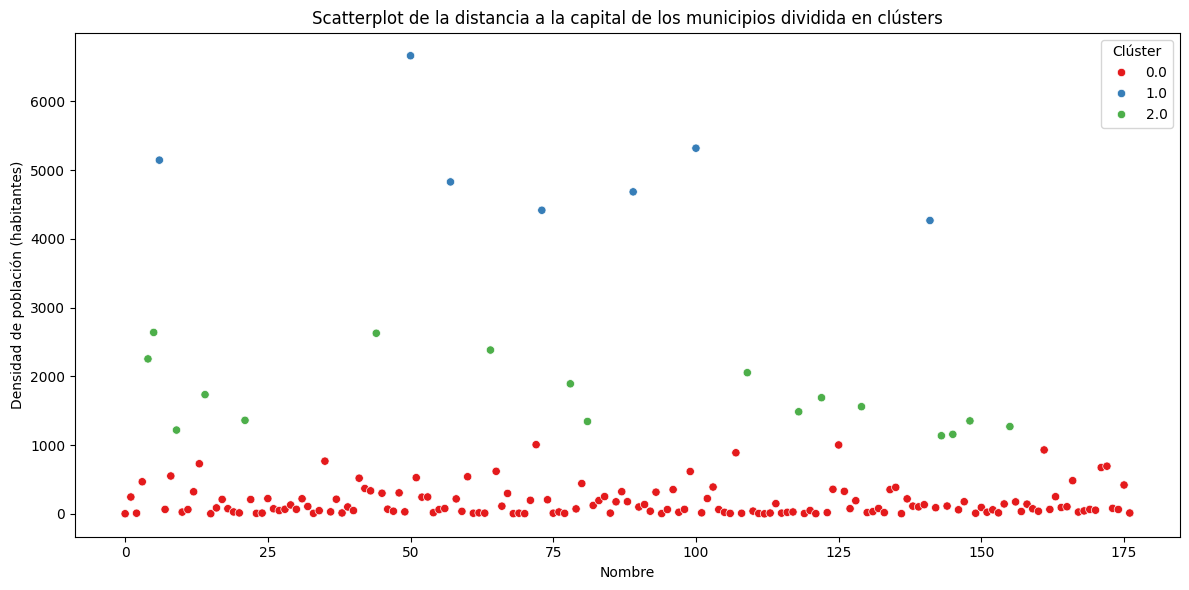

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Leer el archivo CSV
file_path = './dataset.csv'
df = pd.read_csv(file_path, sep=';')


# Definir las columnas de interés
df_sp = df[['densidad_poblacion', 'cluster_densidad_poblacion', 'Nombre']]

# Convertir 'poblaion_censada' a categórico para facilitar el plotting
df_sp['Nombre'] = df_sp['Nombre'].astype('category').cat.codes

# Normalizar los datos
scaler = StandardScaler()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Nombre', y='densidad_poblacion', hue='cluster_densidad_poblacion', data=df_sp, palette='Set1')
plt.title(f'Scatterplot de la distancia a la capital de los municipios dividida en clústers')
plt.xlabel('Nombre')
plt.ylabel('Densidad de población (habitantes)')
plt.legend(title='Clúster')
plt.tight_layout()
plt.show()



     densidad_poblacion  cluster_densidad_poblacion                   Nombre
0                  3.06                         0.0             Acebeda (La)
1                246.21                         0.0                  Ajalvir
2                 10.68                         0.0        Alameda del Valle
3                467.88                         0.0               Alamo (El)
4               2254.21                         2.0        Alcalá de Henares
..                  ...                         ...                      ...
172              694.38                         0.0  Villanueva del Pardillo
173               81.15                         0.0          Villar del Olmo
174               64.79                         0.0    Villarejo de Salvanés
175              420.84                         0.0     Villaviciosa de Odón
176               13.60                         0.0    Villavieja del Lozoya

[177 rows x 3 columns]


C:\Users\movis\AppData\Local\Temp\ipykernel_16244\404385407.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['Nombre'] = df_sp['Nombre'].astype('category').cat.codes
C:\Users\movis\AppData\Local\Temp\ipykernel_16244\404385407.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_densidad_poblacion', y='densidad_poblacion', data=df_sp, palette='Set1')


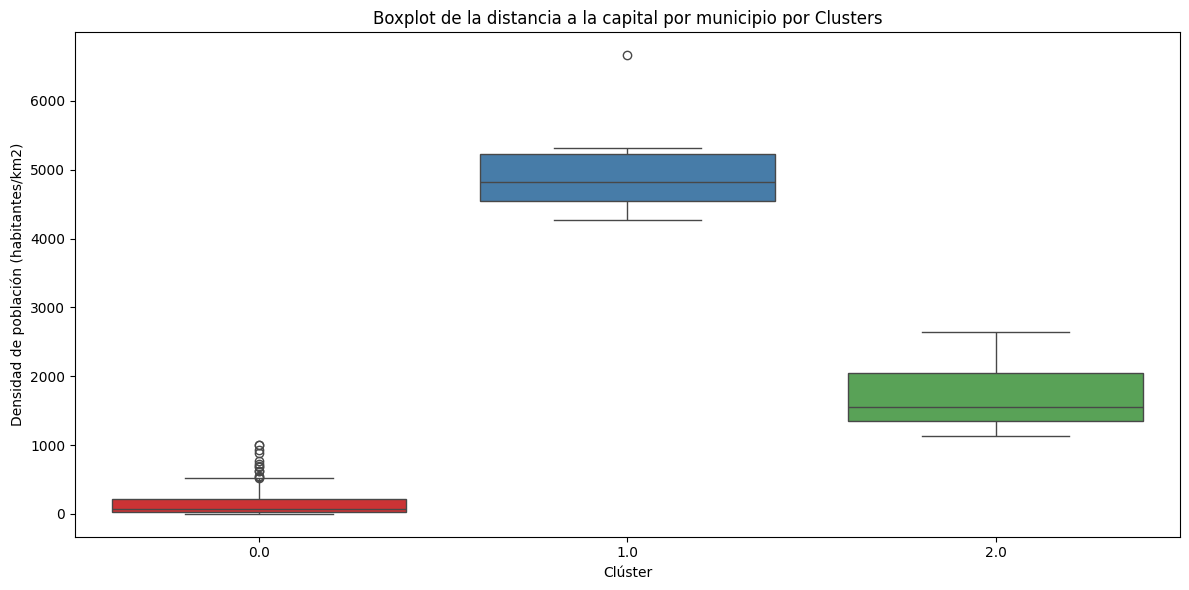

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Leer el archivo temporal en un DataFrame
df = pd.read_csv('dataset.csv', delimiter=';')

# Definir las columnas de interés
df_sp = df[['densidad_poblacion', 'cluster_densidad_poblacion', 'Nombre']]
print(df_sp)

# Filtrar el DataFrame para incluir solo las columnas de interés

# Convertir 'Nombre' a categórico para facilitar el plotting
df_sp['Nombre'] = df_sp['Nombre'].astype('category').cat.codes

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster_densidad_poblacion', y='densidad_poblacion', data=df_sp, palette='Set1')
plt.title('Boxplot de la distancia a la capital por municipio por Clusters')
plt.xlabel('Clúster')
plt.ylabel('Densidad de población (habitantes/km2)')
plt.tight_layout()
plt.show()


15 19
20 24
25 29
30 34
35 39
40 44
45 49
50 54
55 59
60 64


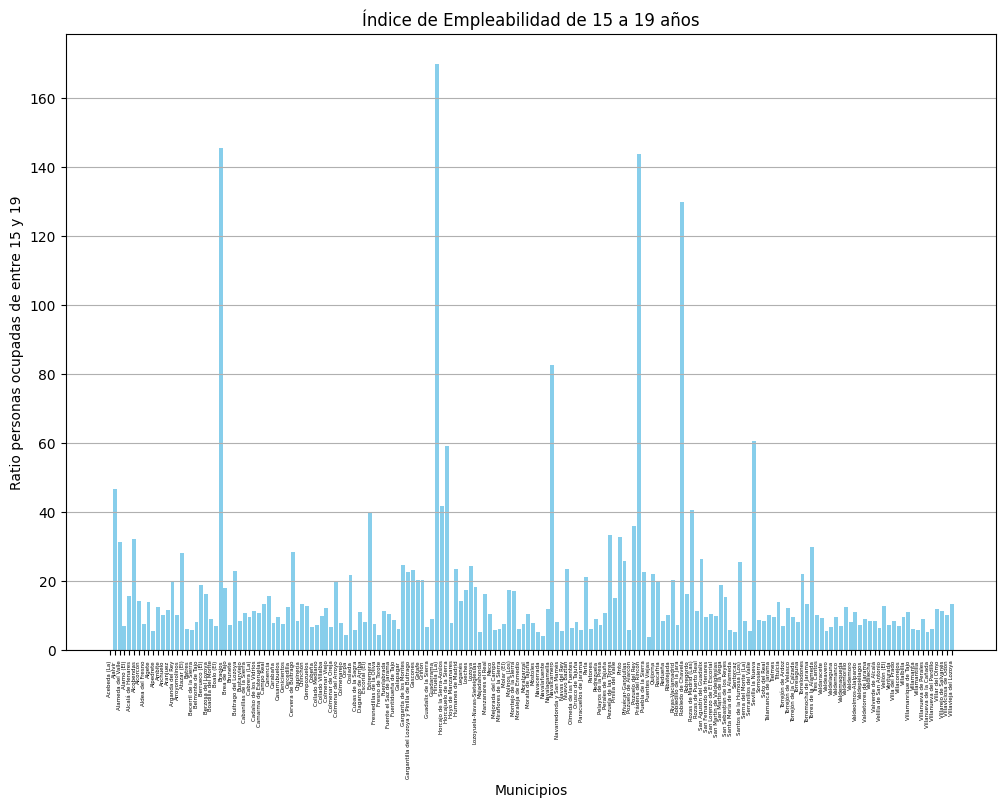

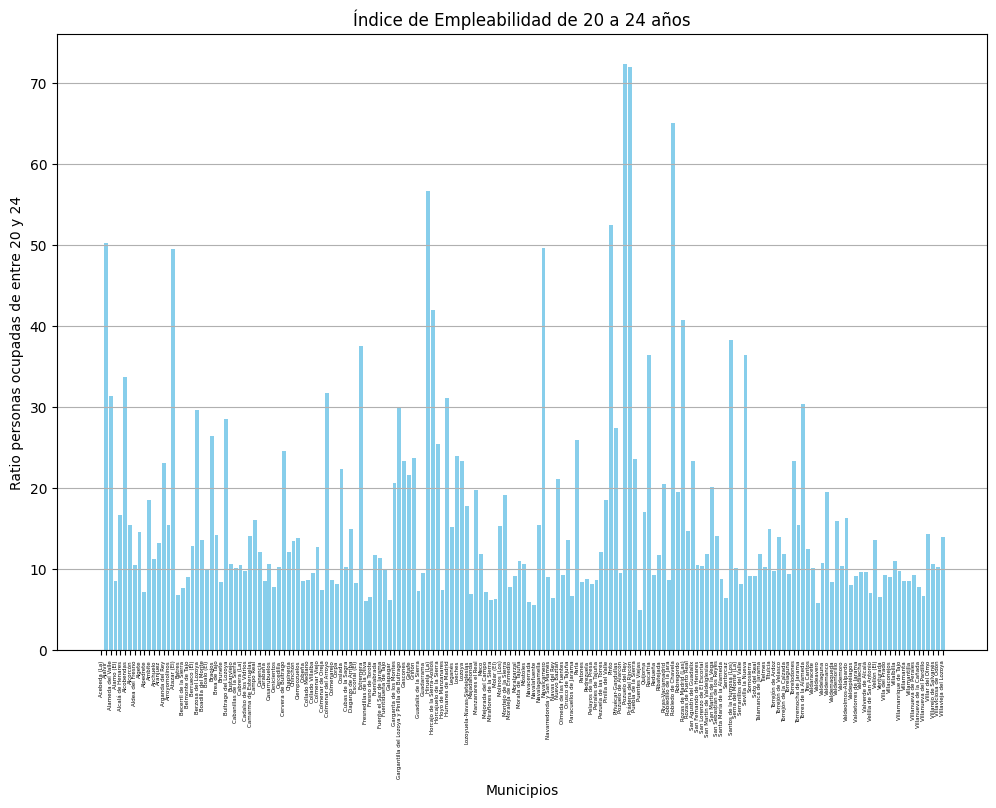

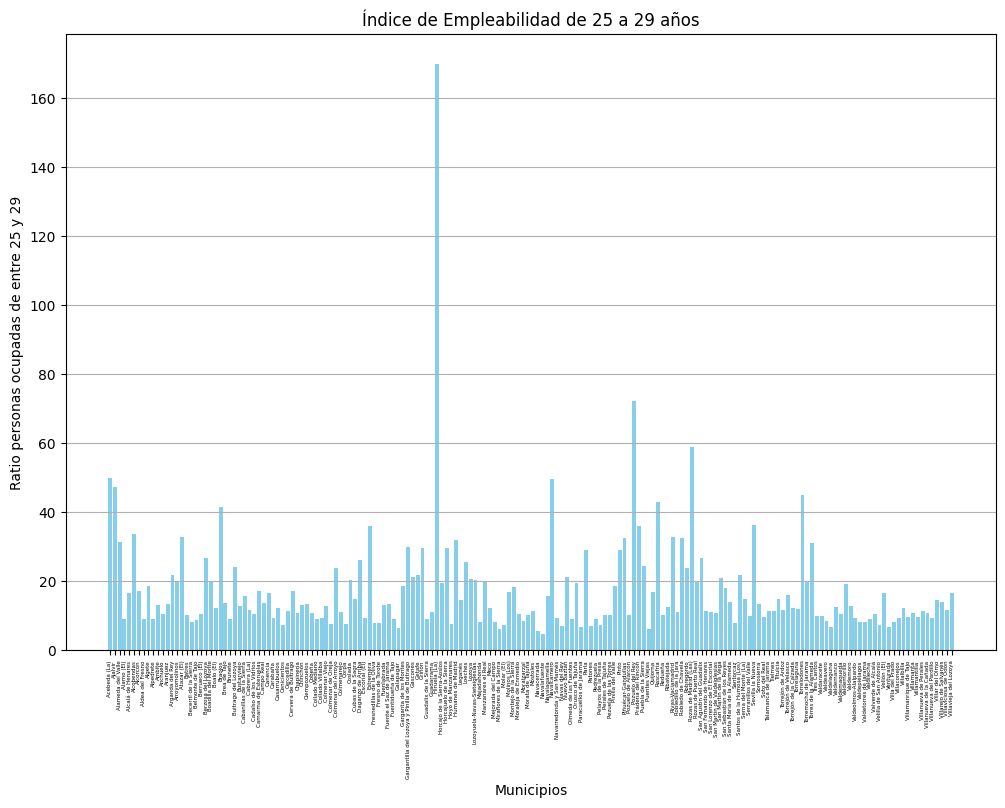

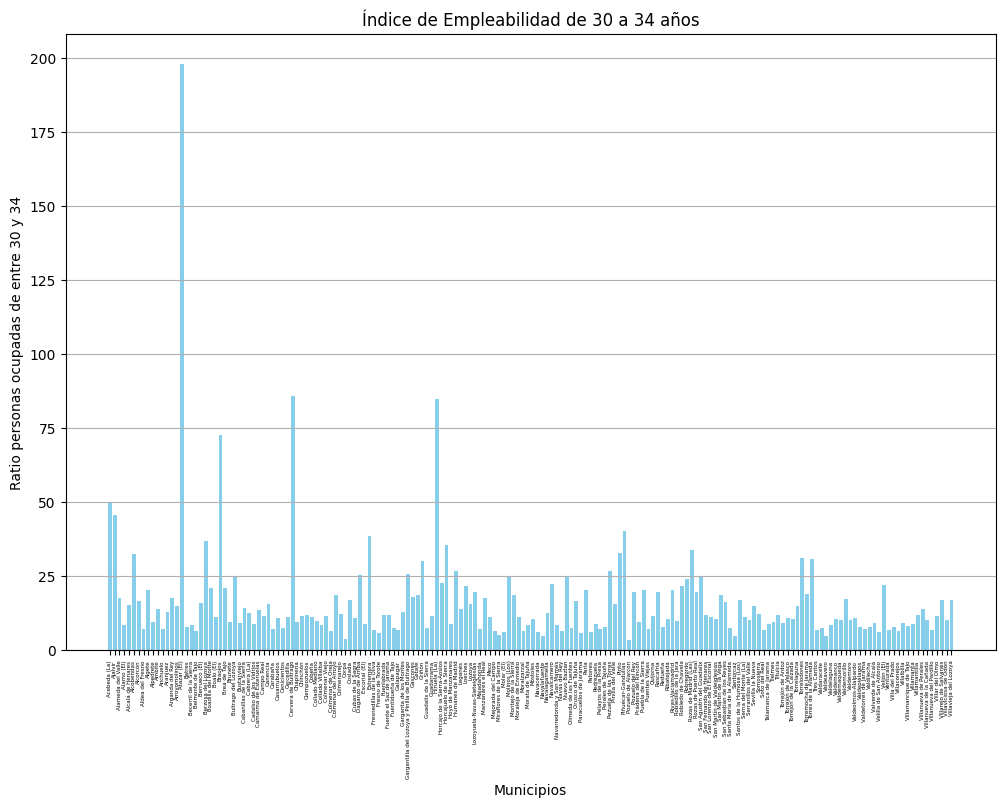

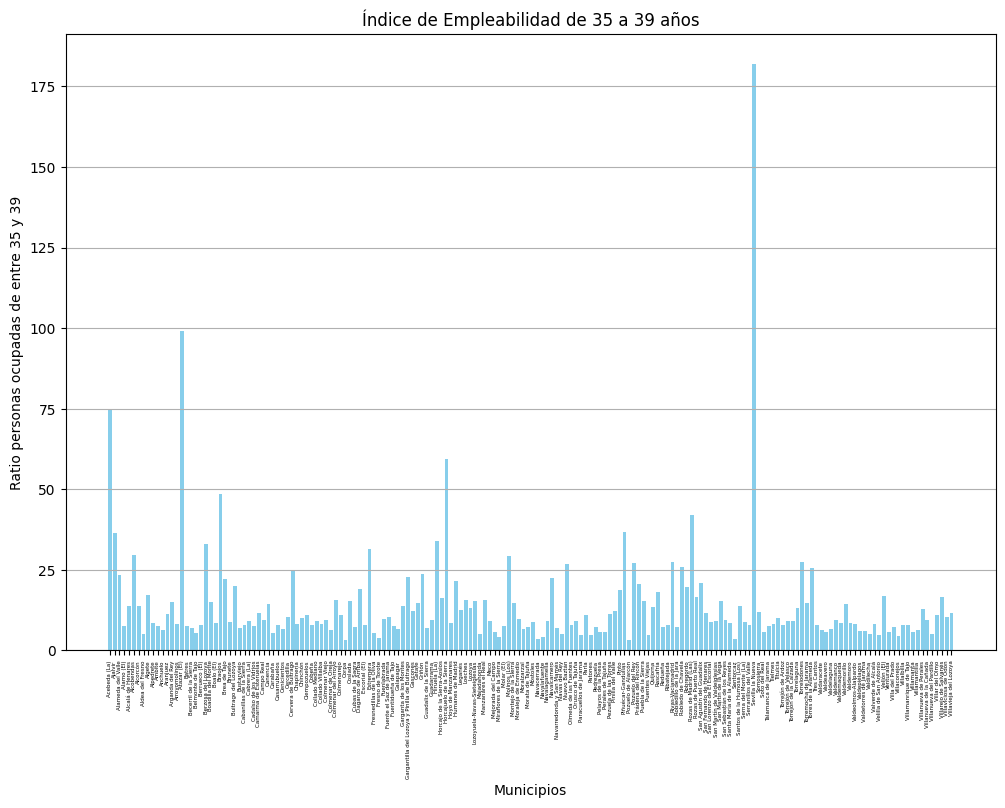

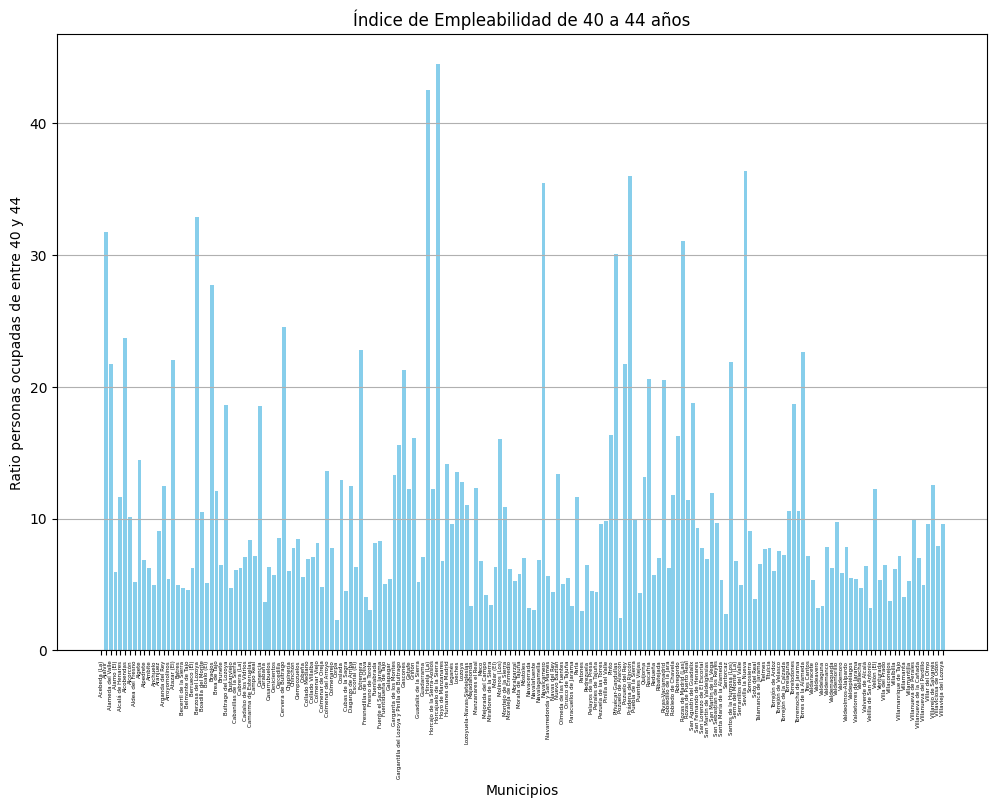

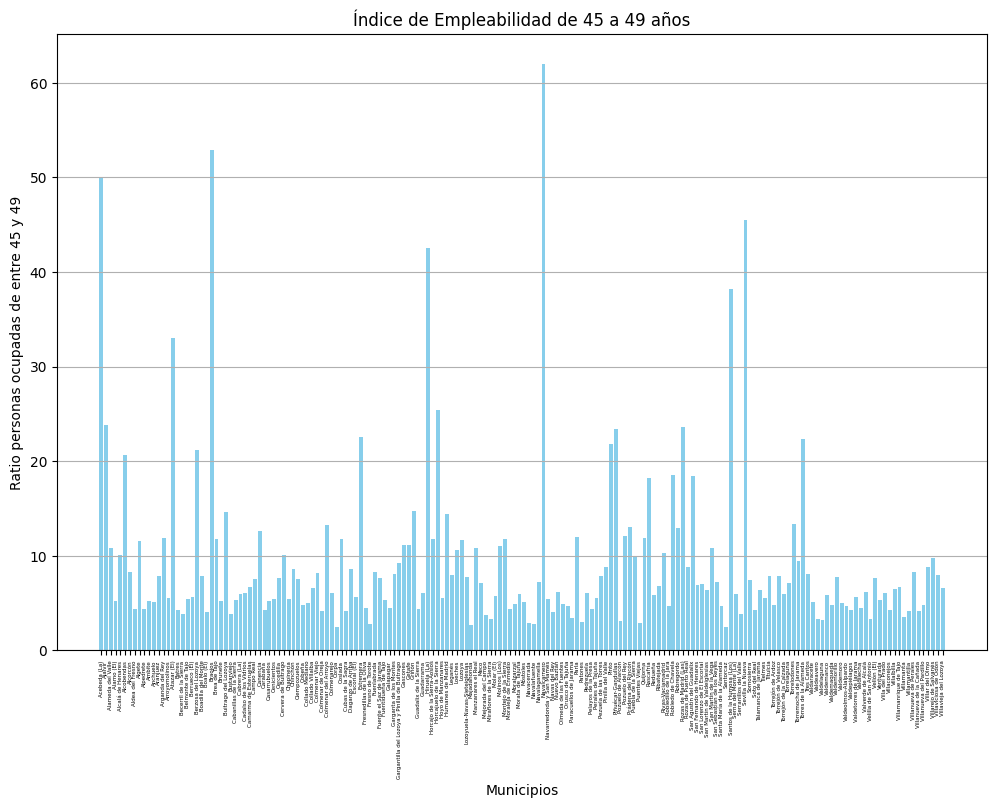

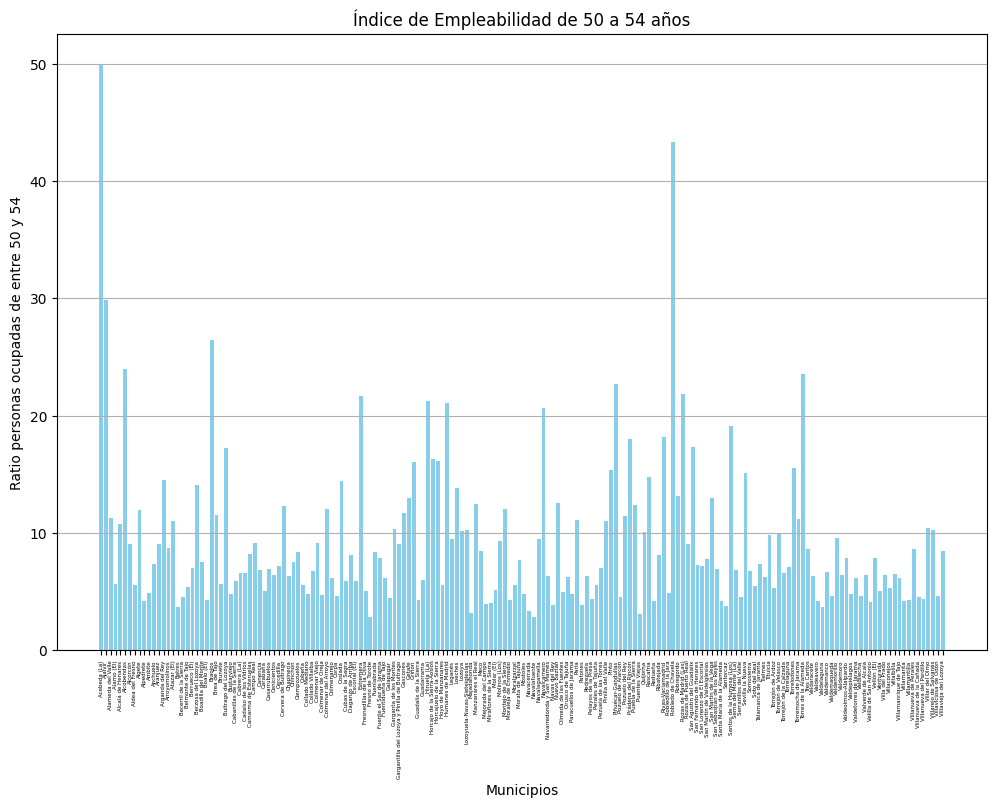

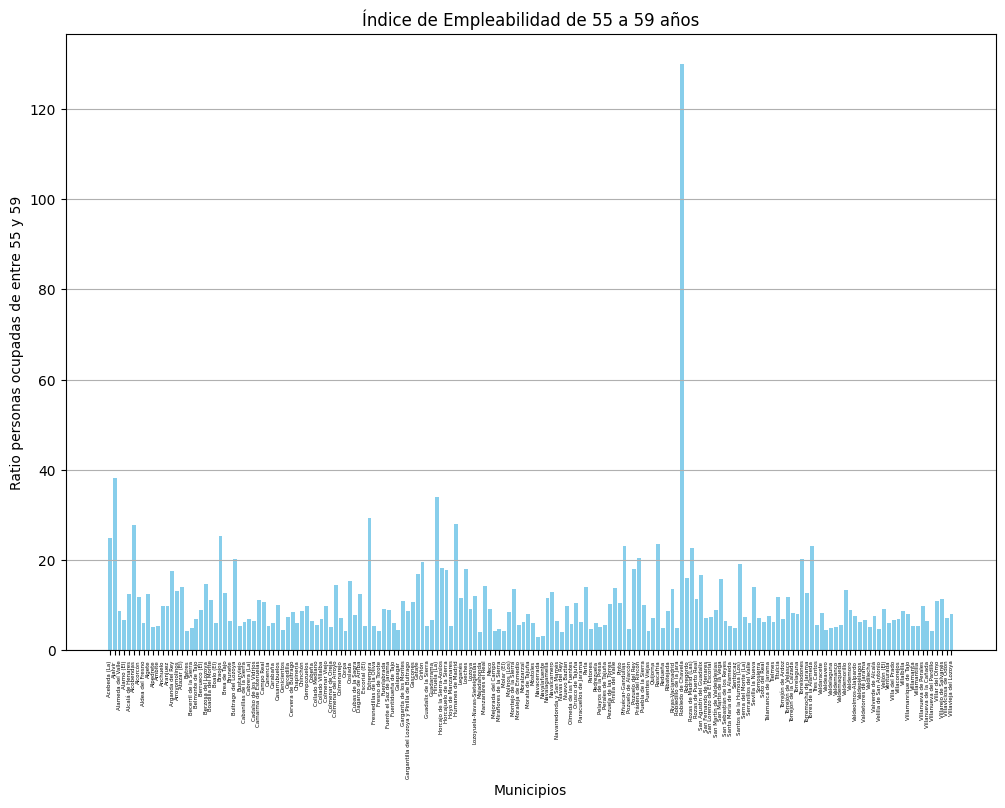

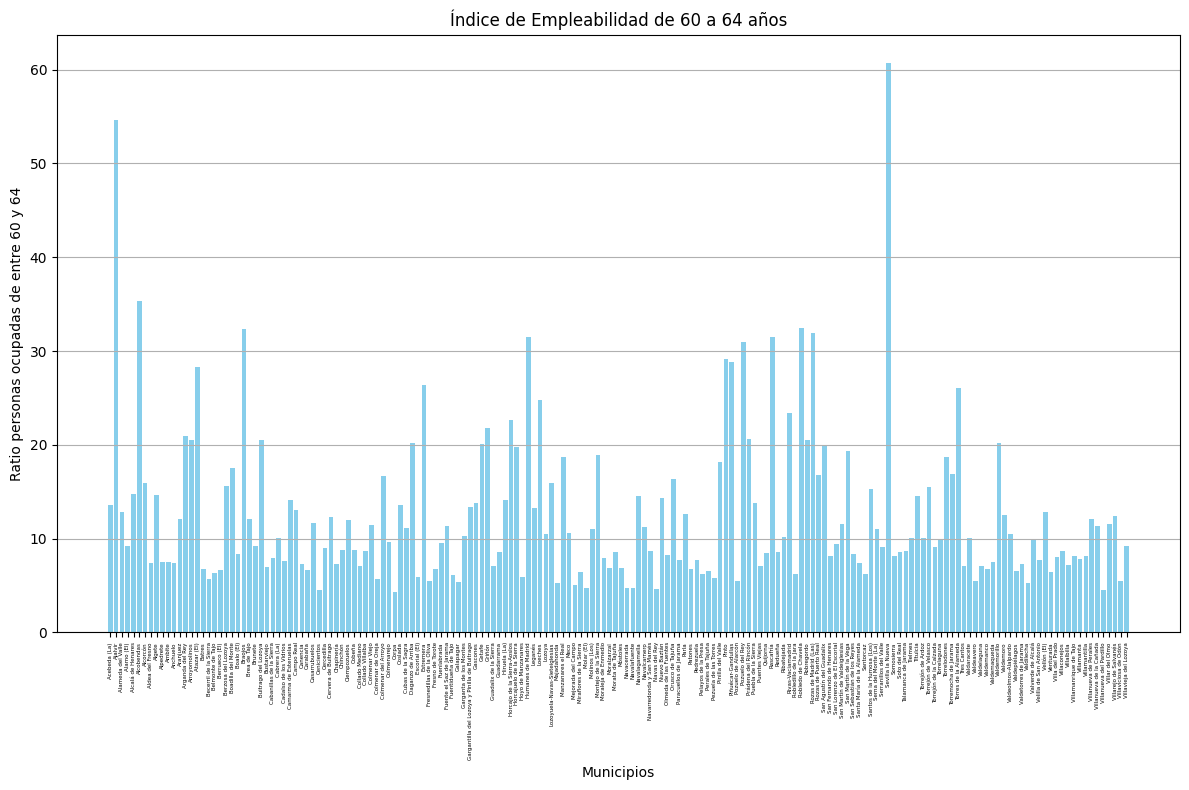

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
path = './dataset.csv'
data = pd.read_csv(path, delimiter=';', index_col=False)

data = data[data['ratio_empleo_por_paro'] <= 100]

# Seleccionar las columnas necesarias
municipios = data['Nombre']
ratios = data['ratio_empleo_por_paro']
grupos_edad_activos = ['poblacion_censada_{}a{}'.format(i, i+4) for i in range(15, 65, 5)]
d = data[grupos_edad_activos].sum(axis=1)
# d = pd.DataFrame()
# d['Nombre'] = data['Nombre']
# d['ratio_empleo_poblacion_activa'] = data['ratio_empleo_secundario_por_poblacion_activa']

# print(d)
# Ratios por grupo de edad
for edad in grupos_edad_activos:
    a1 = edad.split('_')[-1].split('a')[0]
    a2 = edad.split('_')[-1].split('a')[1]
    print(a1, a2)
    ratios = data[f'ratio_empleo_por_{edad}']
    # Crear el gráfico de barras vertical
    plt.figure(figsize=(12, 8))
    plt.bar(municipios, ratios, color='skyblue')
    plt.ylabel(f'Ratio personas ocupadas de entre {a1} y {a2}')
    plt.xlabel('Municipios')
    plt.title(f'Índice de Empleabilidad de {a1} a {a2} años')
    plt.xticks(rotation=90, fontsize=4)  # Rotar los nombres de los municipios para que sean legibles
    plt.grid(axis='y')


# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
# plt.savefig('ratio_contratos_por_municipio.png')  # Guardar el gráfico
plt.show()


In [2]:
%pip install scikit-learn
%pip install pandas
%pip install matplot
%pip install chardet
%pip install xldr
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement xldr (from versions: none)
ERROR: No matching distribution found for xldr


Note: you may need to restart the kernel to use updated packages.


In [36]:
import os, json, csv
from dataset_definition.clean_folder import clean_folder
from dataset_definition.sector_definition import sector_sum_folder
from dataset_definition.dataset import dataset
from dataset_definition.clustering import clustering
from dataset_definition.sector_prediction import sector_predictor
from dataset_definition.ratios import ratio_calculator

def main():
    input_folder = './original_data'
    clean_path = './clean_data'
    clean_path_2020 = './clean_data_2020'

    for folder_name in os.listdir(input_folder):
        # Combinar el nombre del directorio con la ruta base para obtener la ruta completa
        folder_path = os.path.join(input_folder, folder_name)

        if os.path.isdir(folder_path):
            if 'pib' in folder_path:
                output_path_2020 = clean_folder(folder_path, clean_path_2020, 2020)
            else:
                output_path = clean_folder(folder_path, clean_path)
                output_path_2020 = clean_folder(folder_path, clean_path_2020, 2020)
            if 'sector' in folder_path:
                keywords= output_path.split('/')[-1][:-7]
                sector_sum_folder(keyword=keywords, folder=output_path)
                sector_sum_folder(keyword=keywords, folder=output_path_2020)

    dataset_path = 'dataset.csv'
    dataset_2020 = 'dataset_2020.csv'
    dataset(clean_path, dataset_path)
    dataset(clean_path_2020, dataset_2020)
    clusters = ['zona_estadistica_codigo', 'densidad_poblacion', 'distancia_capital', 'poblacion_censada_total']
    for cluster in clusters:
        clustering(dataset_path, cluster)

    sector_predictor(dataset_2020=dataset_2020, dataset_2023=dataset_path)
    ratio_calculator(dataset_path, clusters)

    data = []
    with open(dataset_path, 'r', encoding='utf-8') as csv_file:
        csv_reader = csv.DictReader(csv_file, delimiter=';')
        for row in csv_reader:
            data.append(row)
    json_path = dataset_path.replace('.csv', '.json')
    with open(json_path, 'w', encoding='utf-8') as json_file:
        json.dump(data, json_file, ensure_ascii=False, indent=4)

if __name__=='__main__':
    main()

0      2.0
1      1.0
2      2.0
3      0.0
4      1.0
      ... 
174    0.0
175    0.0
176    2.0
177    2.0
178    0.0
Name: cluster_zona_estadistica, Length: 178, dtype: float64
0      0.0
1      0.0
2      0.0
3      0.0
4      2.0
      ... 
174    0.0
175    0.0
176    0.0
177    0.0
178    0.0
Name: cluster_densidad_poblacion, Length: 178, dtype: float64
0      1.0
1      0.0
2      1.0
3      2.0
4      0.0
      ... 
174    2.0
175    2.0
176    0.0
177    1.0
178    2.0
Name: cluster_distancia_capital, Length: 178, dtype: float64
0      0.0
1      0.0
2      0.0
3      0.0
4      1.0
      ... 
174    0.0
175    0.0
176    0.0
177    0.0
178    0.0
Name: cluster_poblacion_censada, Length: 178, dtype: float64
cluster_zona_estadistica
cluster_densidad_poblacion
cluster_distancia_capital
cluster_poblacion_censada
765
Dataset con ratios guardado en dataset.csv


          Serie  Unnamed: 1             Unnamed: 2   1996   1998   1999  \
12   Municipios        14.0           Acebeda (La)  69.81  72.34  74.47   
13   Municipios        29.0                Ajalvir  30.52  28.23  29.34   
14   Municipios        35.0      Alameda del Valle  54.22  55.56  53.23   
15   Municipios        40.0             Alamo (El)  34.30  33.66  34.18   
16   Municipios        53.0      Alcalá de Henares  29.45  30.56  31.62   
..          ...         ...                    ...    ...    ...    ...   
186  Municipios      1795.0        Villar del Olmo  29.50  27.48  28.45   
187  Municipios      1809.0  Villarejo de Salvanés  33.43  33.62  34.24   
188  Municipios      1816.0   Villaviciosa de Odón  32.21  33.01  34.28   
189  Municipios      1821.0  Villavieja del Lozoya  52.78  51.74  49.42   
190  Municipios      1837.0              Zarzalejo  39.62  40.37  39.88   

      2000   2001   2002   2003  ...   2014   2015   2016   2017   2018  \
12   75.44  78.57  77.36

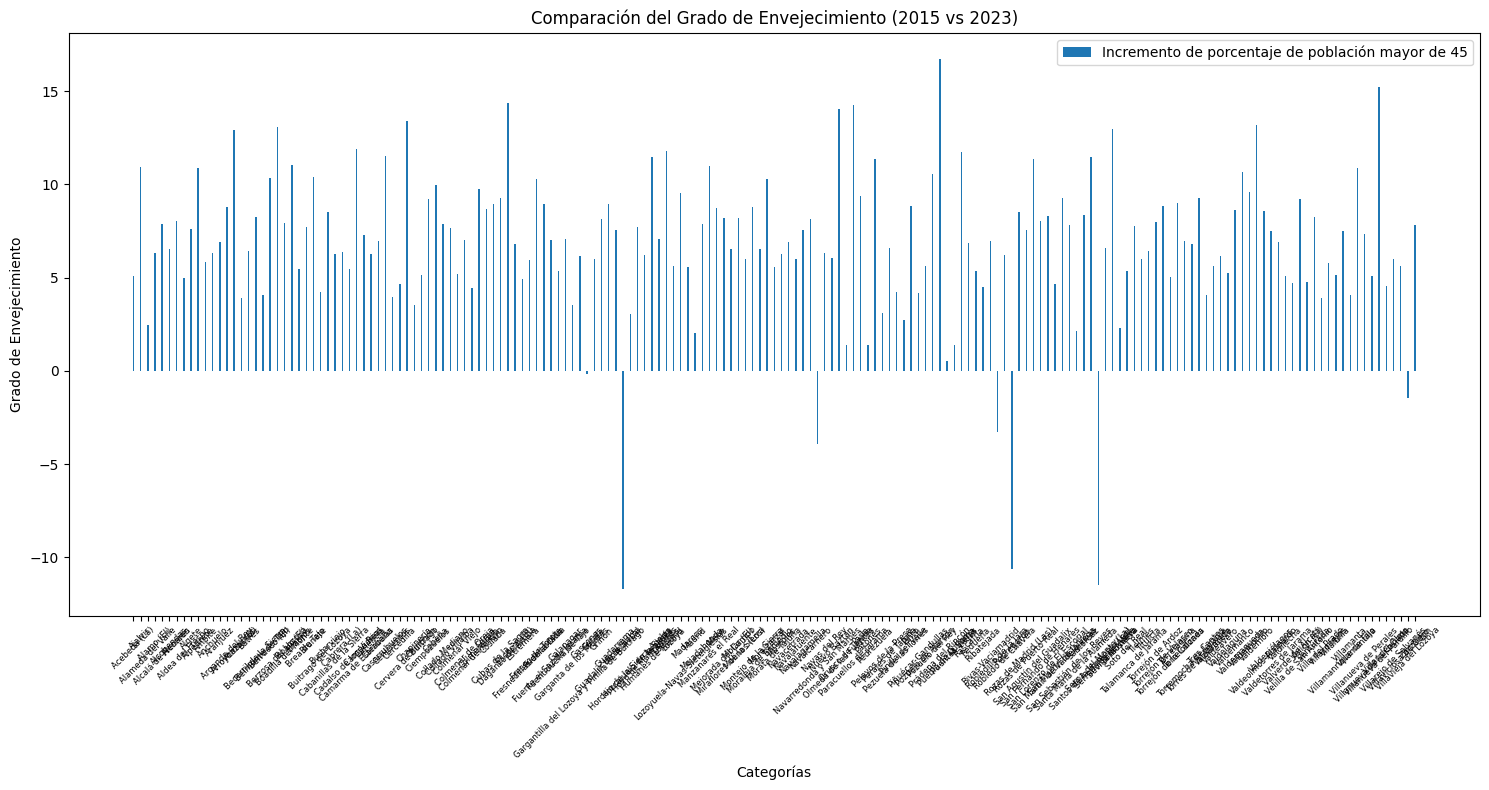

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Definir el camino al archivo original y al archivo temporal
original_file_path = './original_data/otros_datos_poblacionales/grado_envejecimiento_mayores_45.csv'
temp_file_path = './temp_grado_envejecimiento_mayores_45.csv'

# Leer el archivo original y eliminar la primera y las últimas cuatro líneas
with open(original_file_path, 'r') as file:
    lines = file.readlines()
# Escribir las líneas relevantes en un archivo temporal
with open(temp_file_path, 'w') as file:
    file.write
    file.writelines(lines[1:-4])

# Leer el archivo temporal en un DataFrame
df = pd.read_csv(temp_file_path, delimiter=';', index_col=False)
df = df[df['Serie'] == 'Municipios']
print(df)

# Seleccionar las columnas de interés para el gráfico
categorias = df['Unnamed: 2']  # Asumiendo que la primera columna contiene las categorías
  # Asumiendo que la tercera columna contiene los valores de 2023
df['incremento'] = df['2023'] - df['2015']
print(df['incremento'])
# Crear el gráfico de barras
plt.figure(figsize=(15, 8))
plt.bar(categorias, df['incremento'], label='Incremento de porcentaje de población mayor de 45', width=0.2)
plt.xlabel('Categorías')
plt.ylabel('Grado de Envejecimiento')
plt.title('Comparación del Grado de Envejecimiento (2015 vs 2023)')
plt.legend()
plt.xticks(rotation=45, fontsize=6)
plt.tight_layout()
plt.show()
